In [1]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("daniilmiheev/top-spotify-podcasts-daily-updated")

print("Path to dataset files:", path)

# Construct the full path to the CSV file
csv_file_path = os.path.join(path, 'top_podcasts.csv')

# Load the CSV file into a pandas DataFrame
spotify_df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
display(spotify_df.head())

100%|██████████| 252M/252M [00:09<00:00, 27.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/daniilmiheev/top-spotify-podcasts-daily-updated/versions/85


/tmp/ipython-input-3981646591.py:14: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  spotify_df = pd.read_csv(csv_file_path)


,date,rank,region,chartRankMove,episodeUri,showUri,episodeName,description,show.name,show.description,show.publisher,duration_ms,explicit,languages,release_date,release_date_precision,show.media_type,show.total_episodes
0,2024-09-02,1,us,UNCHANGED,37kBZRr3nqjltQXt8KuiDJ,4rOoJ6Egrf8K2IrywzwOMk,#2197 - Mike Baker,Mike Baker is a former CIA covert operations o...,The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,9872105.0,True,['en'],2024-08-29,day,mixed,2366.0
1,2024-09-02,2,us,UNCHANGED,293KKxbEKt2zrem6XFCxYG,4rOoJ6Egrf8K2IrywzwOMk,#2195 - Andrew Huberman,"Andrew Huberman, PhD, is a neuroscientist and ...",The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,11250345.0,True,['en'],2024-08-27,day,mixed,2366.0
2,2024-09-02,3,us,UNCHANGED,53z4LvgoGjjVkdiJkCGhZX,4rOoJ6Egrf8K2IrywzwOMk,#2196 - Greg Fitzsimmons,"Greg Fitzsimmons is a comedian, actor, and wri...",The Joe Rogan Experience,The official podcast of comedian Joe Rogan.,Joe Rogan,10840020.0,True,['en'],2024-08-28,day,mixed,2366.0
3,2024-09-02,4,us,UP,5rrRkpfKZUUR85WxMYCX9k,0KvuZJgXfOGanBRuq6B9dm,The Worst Creature To Run Into During The Ice Age,The Ice Age was no doubt one of earth’s most q...,ExtinctZoo,"Your one stop shop for all things dinosaurs, p...",ExtinctZoo,1073386.0,False,['en'],2024-08-31,day,mixed,30.0
4,2024-09-02,5,us,DOWN,2Qd2dJDDAocbTjGvXwHOfm,5L2ON33kXa2b7laBpCAgOI,"Jeffrey Sachs: Trump’s Plan to Stop WWIII, CIA...",Professor Jeffrey Sachs’s provides a full and ...,The Tucker Carlson Show,The Tucker Carlson Show is your beacon of free...,Tucker Carlson Network,8896992.0,False,['en'],2024-08-30,day,audio,115.0


In [9]:
spotify_df.shape


(440000, 19)

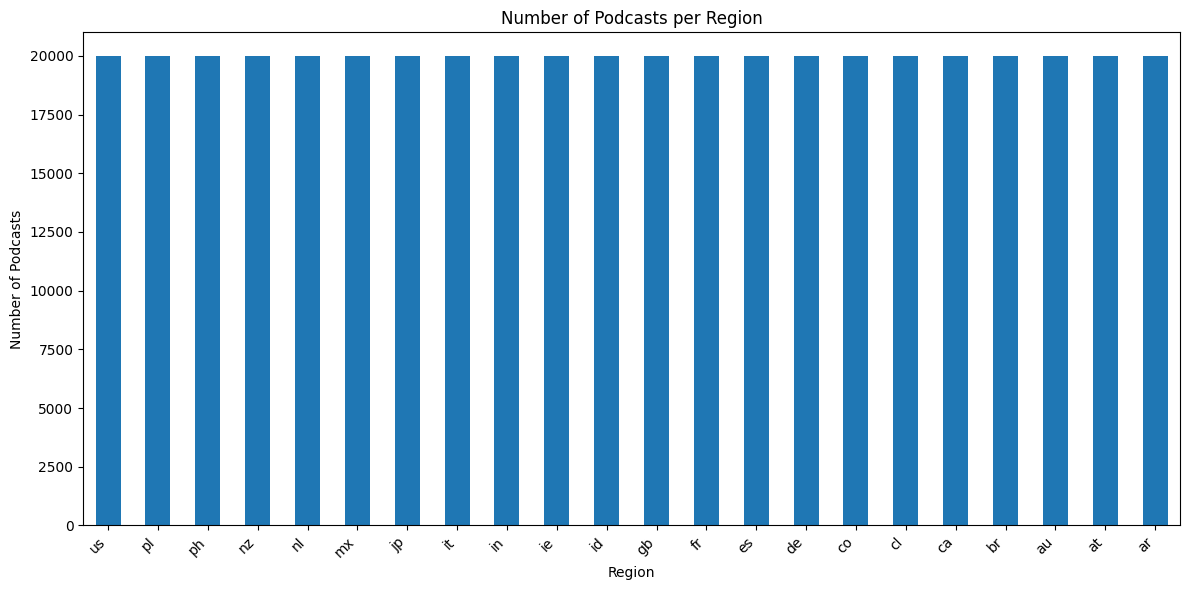

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
spotify_df['region'].value_counts().plot(kind='bar')
plt.title('Number of Podcasts per Region')
plt.xlabel('Region')
plt.ylabel('Number of Podcasts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert duration from milliseconds to minutes for better readability
spotify_df['duration_minutes'] = spotify_df['duration_ms'] / (1000 * 60)

# Calculate average duration for each region and language combination
average_duration_by_region_language = spotify_df.groupby(['region', 'languages'])['duration_minutes'].mean().reset_index()

print("Average podcast duration by region and language (first 5 rows):")
display(average_duration_by_region_language.head())

print("\nValue counts for 'languages' column to understand distribution:")
display(spotify_df['languages'].value_counts())

Average podcast duration by region and language (first 5 rows):


,region,languages,duration_minutes
0,ar,['en'],90.814401
1,ar,['en-US'],119.673529
2,ar,['es'],60.059475
3,ar,['es-AR'],66.442824
4,ar,['es-CL'],50.618460



Value counts for 'languages' column to understand distribution:


,count
languages,
['en'],122324
['es'],58582
['de'],35181
['fr'],19835
['ja'],19272
['id'],18588
['pl'],18519
['en-US'],17362
['it'],16410


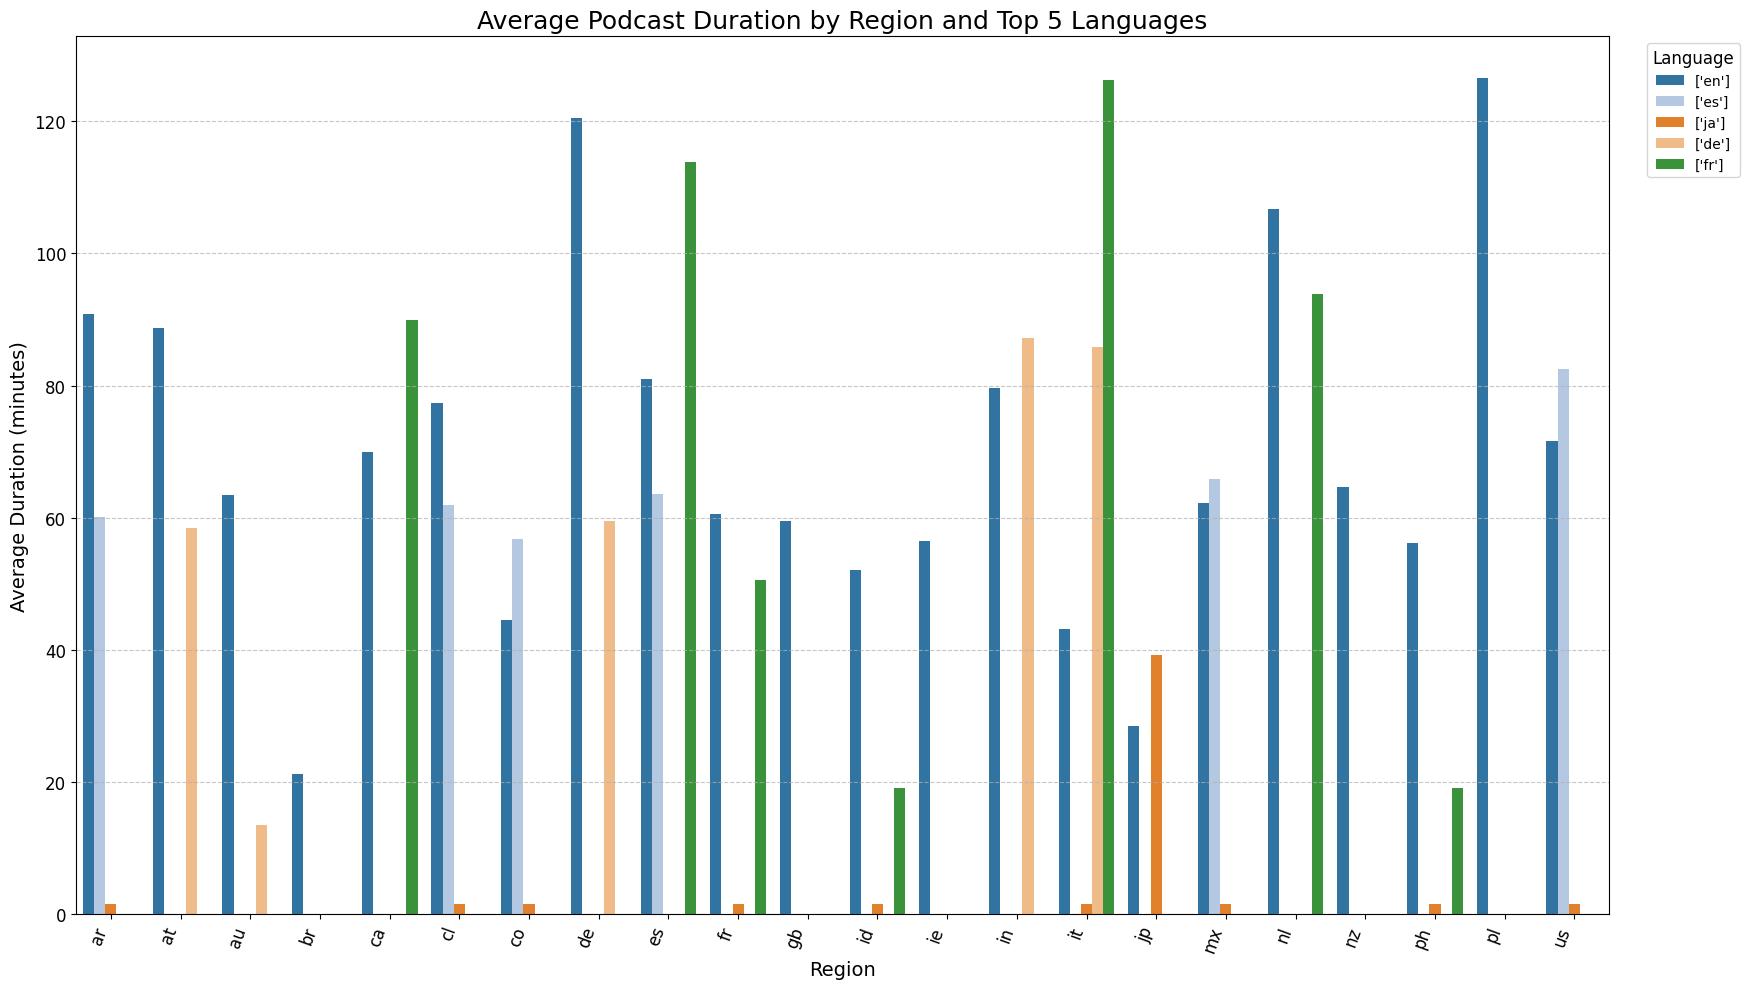

In [4]:
# Plotting the average podcast duration by region and language
plt.figure(figsize=(20, 10)) # Adjust figure size for better visibility

# Determine the top languages to display
num_languages_to_display = 5 # You can change this number to show more or fewer languages
top_languages = spotify_df['languages'].value_counts().nlargest(num_languages_to_display).index.tolist()

# Filter the average_duration_by_region_language DataFrame
filtered_average_duration = average_duration_by_region_language[
    average_duration_by_region_language['languages'].isin(top_languages)
]

sns.barplot(
    data=filtered_average_duration, # Use the filtered data
    x='region',
    y='duration_minutes',
    hue='languages',
    palette='tab20' # Using a palette that supports many distinct colors
)

plt.title(f'Average Podcast Duration by Region and Top {num_languages_to_display} Languages', fontsize=18)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Average Duration (minutes)', fontsize=14)
plt.xticks(rotation=70, ha='right', fontsize=12) # Rotate x-axis labels for readability
plt.yticks(fontsize=12)
plt.legend(title='Language', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 0.88, 1]) # Adjust layout to prevent legend from overlapping
plt.show()

/tmp/ipython-input-208315669.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


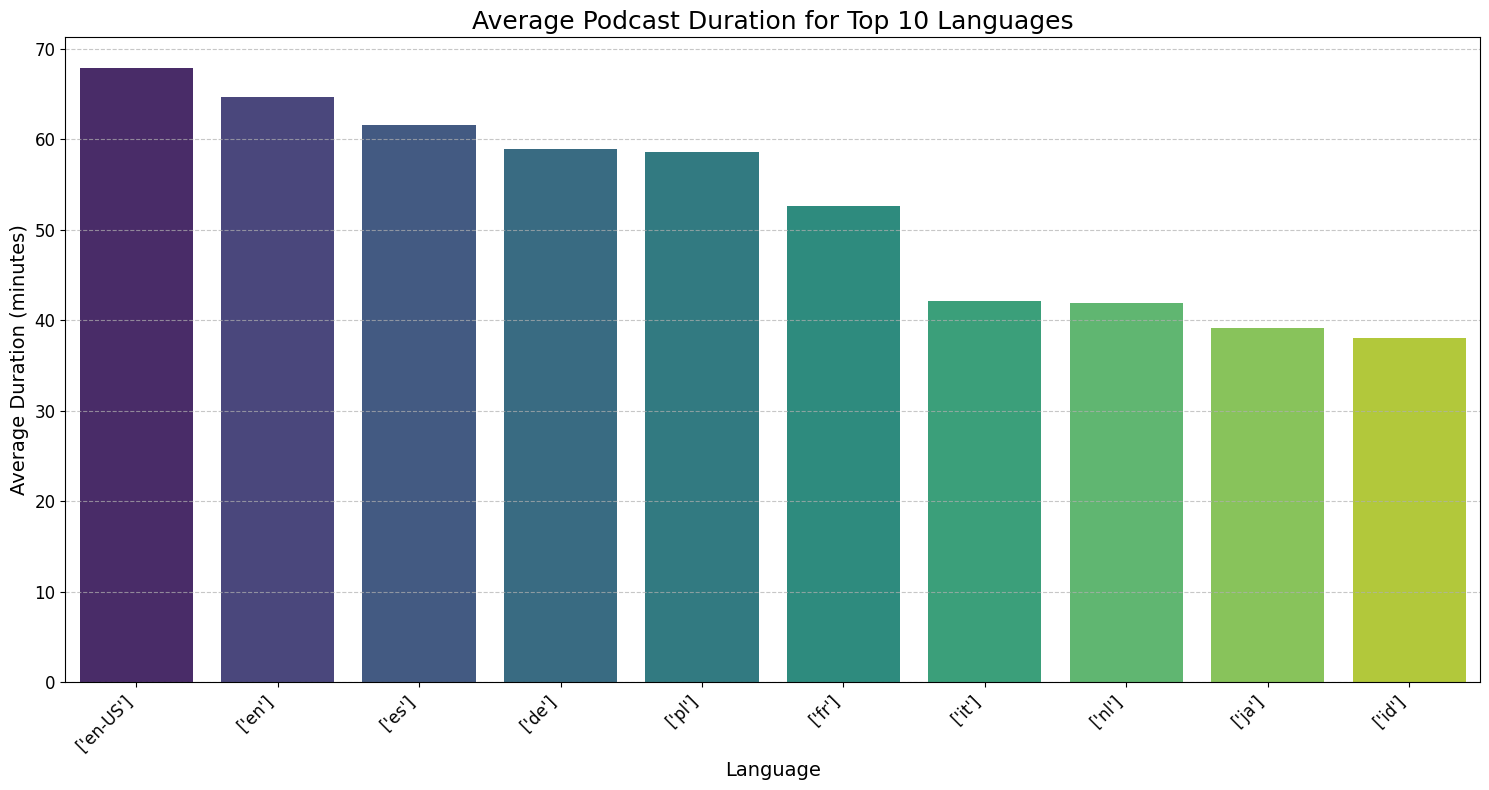

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average duration for each language
average_duration_by_language = spotify_df.groupby('languages')['duration_minutes'].mean().reset_index()

# Get the top 10 most frequent languages to display
top_10_languages = spotify_df['languages'].value_counts().nlargest(10).index.tolist()

# Filter the average duration DataFrame for these top languages
filtered_average_duration_by_language = average_duration_by_language[
    average_duration_by_language['languages'].isin(top_10_languages)
].sort_values(by='duration_minutes', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(
    data=filtered_average_duration_by_language,
    x='languages',
    y='duration_minutes',
    palette='viridis'
)

plt.title('Average Podcast Duration for Top 10 Languages', fontsize=18)
plt.xlabel('Language', fontsize=14)
plt.ylabel('Average Duration (minutes)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1751081226.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_languages.index, y=top_5_languages.values, palette='viridis')


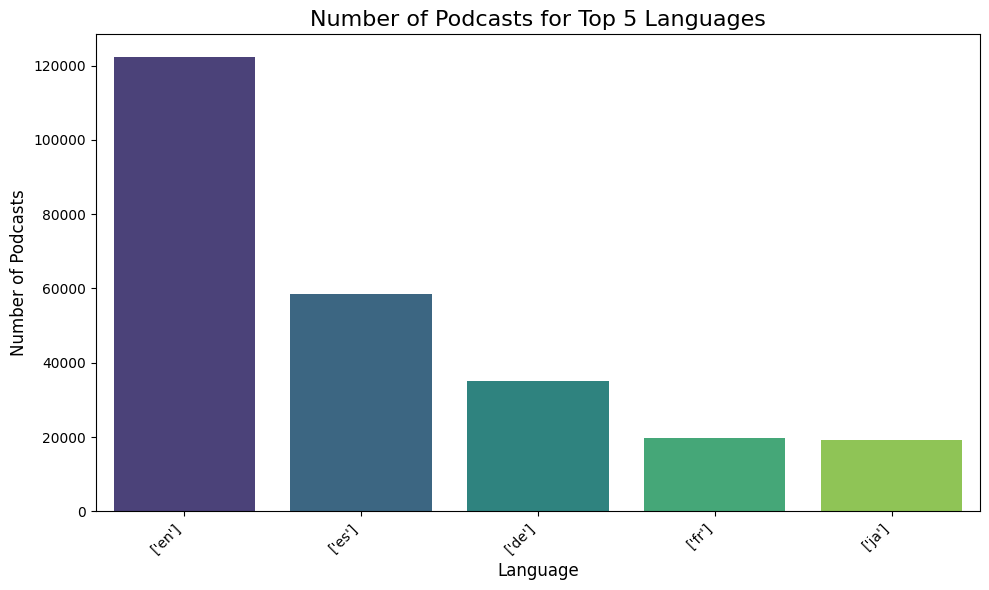

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of podcasts for each language and select the top 5
top_5_languages = spotify_df['languages'].value_counts().nlargest(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_languages.index, y=top_5_languages.values, palette='viridis')

plt.title('Number of Podcasts for Top 5 Languages', fontsize=16)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Number of Podcasts', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
spotify_df["region"].value_counts()

,count
region,
us,20000
pl,20000
ph,20000
nz,20000
nl,20000
mx,20000
jp,20000
it,20000
in,20000
